In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import uncertainties.unumpy as unp
from uncertainties import ufloat

In [2]:
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{siunitx}')
plt.rc('font', family='serif')
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 22
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{siunitx}'

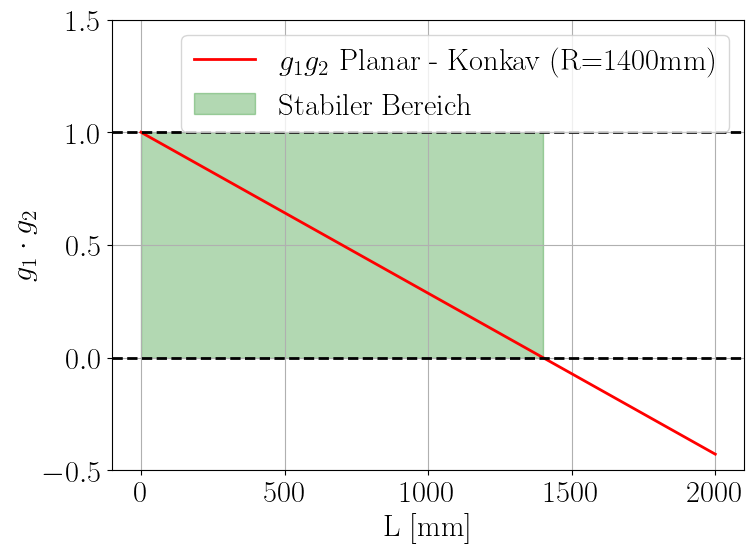

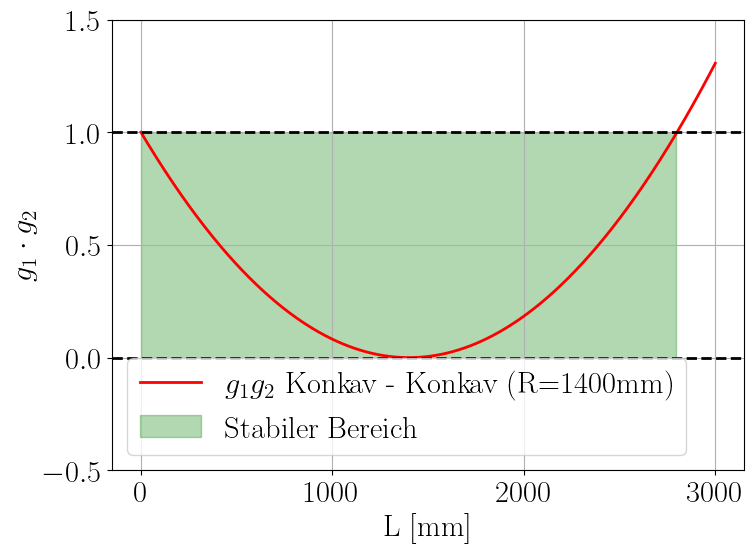

Maximale Resonatorabstände (theoretisch für Stabilität):
Planar - Konkav (R=1400.0mm): Stabiler Bereich: 0 < L < 1400.0 mm
Symmetrisch Konkav (R=1400.0mm): Stabiler Bereich: 0 < L < 2800.0 mm


In [12]:

def calculate_g1g2(L, R1, R2):

    # Stelle sicher, dass L ein NumPy-Array ist, um Broadcasting zu nutzen
    L_arr = np.asarray(L)

    if R1 == np.inf:
        g1 = np.ones_like(L_arr)  # Array von Einsen, gleiche Form wie L
    else:
        g1 = 1 - L_arr / R1

    if R2 == np.inf:
        g2 = np.ones_like(L_arr)  # Array von Einsen, gleiche Form wie L
    else:
        g2 = 1 - L_arr / R2

    return g1 * g2

# Spiegelkonfigurationen basierend auf Tabelle 1 (angenommene Kombinationen)
# Radien in mm
configurations = [
    {
        "name": "Planar - Konkav (R=1400mm)",
        "R1": np.inf,  # Spiegel 1: plan
        "R2": 1400.0,  # Spiegel 2: konkav
        "L_max": 2000,
    },
    {
        "name": "Konkav - Konkav (R=1400mm)",
        "R1": 1400.0, # Spiegel 1: konkav
        "R2": 1400.0, # Spiegel 2: konkav
        "L_max": 3000, # R1 + R2 = 2400, etwas mehr für den Plot
    }
]

# Erstelle Plots für jede Konfiguration
for config in configurations:
    R1 = config["R1"]
    R2 = config["R2"]
    name = config["name"]
    L_max = config["L_max"]

    # Erzeuge L-Werte (Resonatorlänge)
    # L muss > 0 sein, aber wir starten nahe 0 für den Plot
    L_values = np.linspace(0.01, L_max, 500)
    g1g2_values = calculate_g1g2(L_values, R1, R2)

    plt.rcParams['figure.figsize'] = (8, 6)
    plt.plot(L_values, g1g2_values,"r-", label=f'$g_1 g_2$ {name}')

    # Stabilitätsgrenzen hervorheben
    plt.axhline(0, color='black', linestyle='--')
    plt.axhline(1, color='black', linestyle='--')

    # Stabilen Bereich schattieren
    stable_condition = (g1g2_values > 0) & (g1g2_values < 1)
    plt.fill_between(
        L_values,
        0,
        1,
        where=stable_condition,
        color='green',
        alpha=0.3,
        label='Stabiler Bereich'
    )
    plt.xlabel(r'L [\si{\milli\meter}]')
    plt.ylabel(r'$g_1 \cdot g_2$')
    plt.legend()
    plt.grid(True)
    plt.ylim(-0.5, 1.5) # Y-Achsenbereich anpassen, um Stabilitätsgrenzen gut zu sehen
    plt.tight_layout()
    plt.savefig(f"{L_max}.png")
    plt.show()

print("Maximale Resonatorabstände (theoretisch für Stabilität):")
R_konkav2 = 1400.0
print(f"Planar - Konkav (R={R_konkav2}mm): Stabiler Bereich: 0 < L < {R_konkav2} mm")

R_sym = 1400.0
print(f"Symmetrisch Konkav (R={R_sym}mm): Stabiler Bereich: 0 < L < {2 * R_sym} mm")


plt.show()

In [10]:
x = np.asarray([val for val in range(-15,16)])
xlin=np.linspace(x[0],x[-1],100)
I1 = [0.15,0.36,0.64,0.96,1.25,1.59,2.1,2.65,3,3.1,2.86,2.38,1.6,0.92,0.33,0.05,0.1,0.2,0.5,1.13,1.68,2.4,2.8,2.9,2.7,2.3,1.87,1.3,0.81,0.48,0.26]
I2 = [0.03,0.04,0.08,0.15,0.3,0.53,0.9,1.46,2.35,3.6,5,6.7,8.24,9.8,10.5,10.4,10,9.3,8.2,6.5,5.2,4.3,3,2,1.35,0.9,0.6,0.35,0.18,0.09,0.05]
d = 72
alpha = [val*10 for val in range(0,36)]
I3 = [0.61,1.16,1.8,2.5,3.08,3.7,3.9,4,3.82,3.4,2.92,2.25,1.5,0.89,0.39,0.1,0.05,0.2,0.59,1.1,1.82,2.47,3.05,3.51,3.9,3.88,3.85,3.48,2.85,2.27,1.50,0.9,0.4,0.1,0.04,0.22]

C: 3.24 +- 0.01
b: -0.07 +- 0.04
w: 8.47 +- 0.09


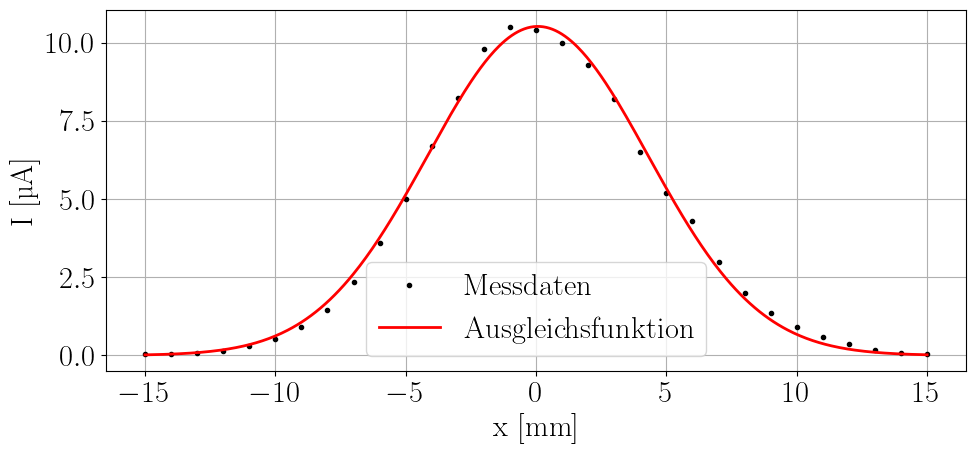

C: 1.39 +- 0.01
b: -0.77 +- 0.07
w: 9.75 +- 0.10


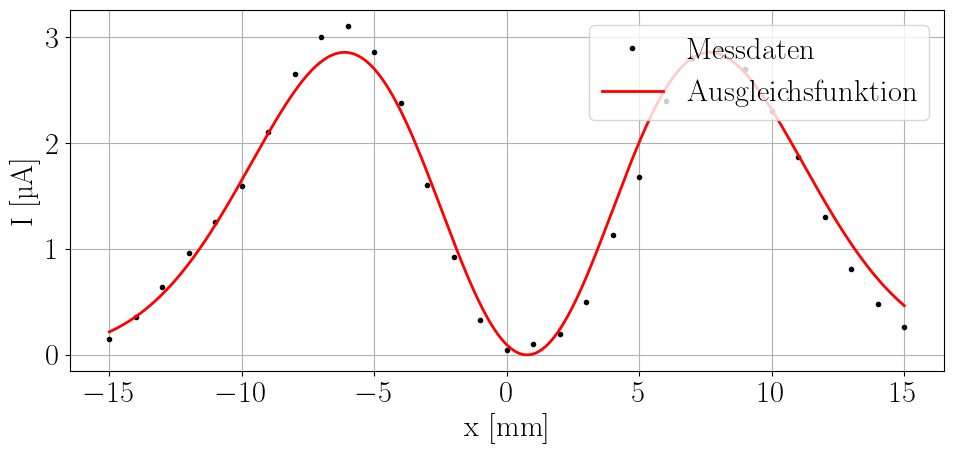

<Figure size 1000x500 with 0 Axes>

In [14]:
def hermite(n, x):
    if n == 0:
        return 1
    elif n == 1:
        return 2 * x
    else:
        return 2 * x * hermite(n - 1, x) - 2 * (n - 1) * hermite(n - 2, x)

def A(x,m,C,b,w):
    xs=np.sqrt(2)*(x+b)/w
    return C*hermite(m,xs)*np.exp(-(xs**2)/2)
def fitfunc1(x,C,b,w):
    return A(x,0,C,b,w)**2
def fitfunc2(x,C,b,w):
    return A(x,1,C,b,w)**2

plt.rcParams['figure.figsize'] = (10, 5)
plt.grid(True)
plt.xlabel(r"x [\si{\milli\meter}]") # Call the function
plt.ylabel(r"I [\si{\micro\ampere}]") # Call the function
params,_=curve_fit(fitfunc1,x,I2)
for name,par,un in zip(["C","b","w"],params,np.sqrt(np.diag(_))):
    print(f"{name}: {par:.2f} +- {un:.2f}")
plt.plot(x,I2,"k.",label="Messdaten")
plt.plot(xlin,fitfunc1(xlin,*params),"r-",label="Ausgleichsfunktion")
plt.legend()
plt.tight_layout()
plt.savefig("TEM00Mode.png", dpi=300)
plt.show()
plt.clf()

plt.xlabel(r"x [\si{\milli\meter}]") # Call the function
plt.ylabel(r"I [\si{\micro\ampere}]") # Call the function
plt.grid(True)
params,_=curve_fit(fitfunc2,x,I1)
for name,par,un in zip(["C","b","w"],params,np.sqrt(np.diag(_))):
    print(f"{name}: {par:.2f} +- {un:.2f}")
plt.plot(x,I1,"k.",label="Messdaten")
plt.plot(xlin,fitfunc2(xlin,*params),"r-",label="Ausgleichsfunktion")

plt.legend(loc="upper right")
plt.tight_layout()
plt.savefig("TEM10Mode.png", dpi=300)
plt.show()
plt.clf()

#plt.plot(x,I2/np.max(I2),".",color="grey")
x_ = np.linspace(-15,15,100)


A: 3.95 +- 0.02
w: 1.00 +- 0.00
phi: 0.39 +- 0.00
b: 0.03 +- 0.01


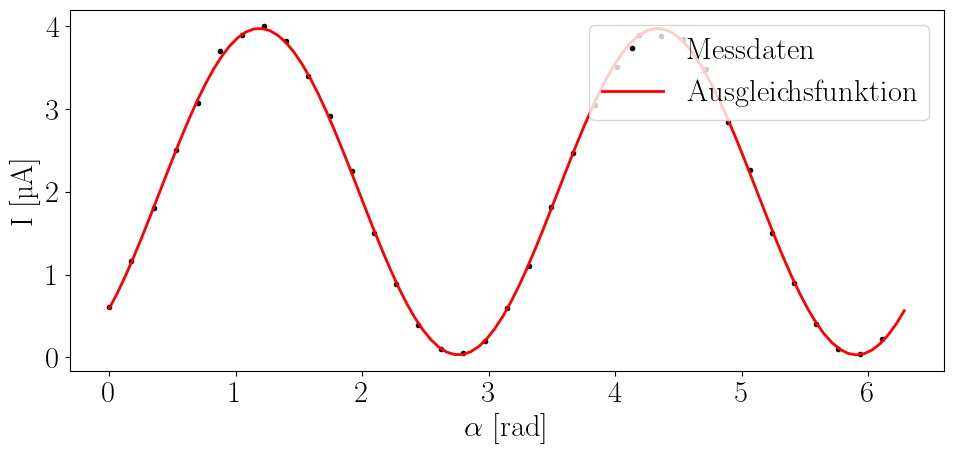

In [19]:
plt.xlabel(r"$\alpha$ [\si{\radian}]") # Call the function
plt.ylabel(r"I [\si{\micro\ampere}]") # Call the function
alpharad = np.array([al/360*2*np.pi for al in alpha])
def sine_squared(x, A, w, phi, b):
    return A * (np.sin(w * x + phi))**2 + b
params, pcov = curve_fit(sine_squared, alpharad, I3)
plt.plot(alpharad,I3,"k.",label="Messdaten")
alpha_ = np.linspace(0,2*np.pi,100)
for name,par,un in zip(["A","w","phi","b"],params,np.sqrt(np.diag(pcov))):
    print(f"{name}: {par:.2f} +- {un:.2f}")
plt.plot(alpha_,sine_squared(alpha_,*params),"r-",label="Ausgleichsfunktion")
plt.legend(loc="upper right")
plt.tight_layout()

plt.savefig("polarisation.png", dpi=300)
plt.show()

In [4]:
from scipy import constants as c
import numpy as np

ds = np.array([82,72,92,102,62,144])/100
fpeaks = [[[181,-10.4],[363.7,-11.4],[545.5,-12],[727,-13],[909,-17],[1091,-29],[1273,-40]],
          [[206,-13],[413,-14.4],[620,-16],[826,-19],[1033,-30],[1240,-44]],
          [[161.7,-7.6],[323,-8],[485,-10],[647,-10],[810,-14],[972,-22],[1134,-32],[1296,-42]],
          [[146,-9],[292,-10],[438,-12],[584,-12],[731,-13],[877,-18],[1169,-32],[1317,-42]],
          [[239,-9],[478,-10],[718,-12],[957,-22],[1197,-37]],
          [[103,6],[207,6],[310,5.5],[414,5],[517,4],[621,2],[724,1],[828,-2],[932,-8],[1035,-15],[1242,-30],[1346,-37]]]

measured = []
for d, f in zip(ds, fpeaks):
    fpeak = np.array([item[0] for item in f])
    fdiffs = (fpeak[1:] - fpeak[:-1]) * 2 * d
    measured.append((fdiffs[fdiffs < 40000].mean() * 1000000) / c.c)

np.array(measured).mean()

1.0330000331349865

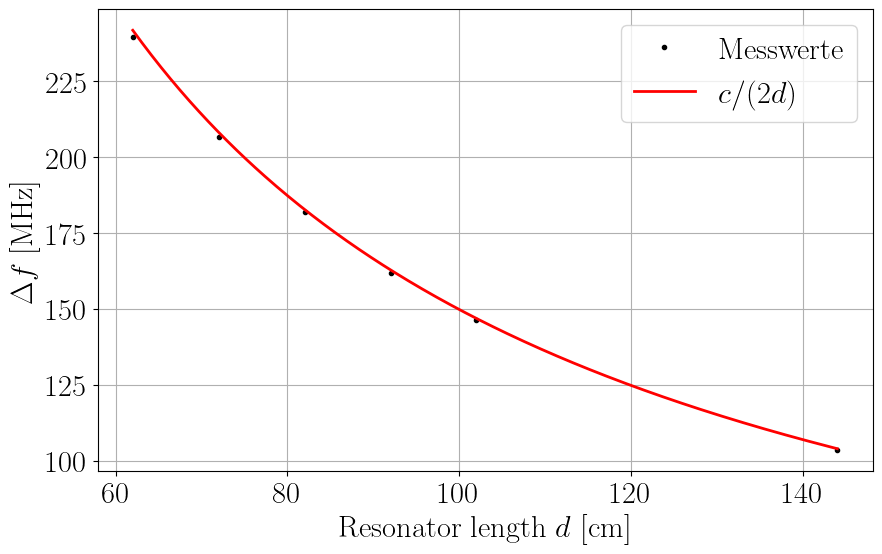

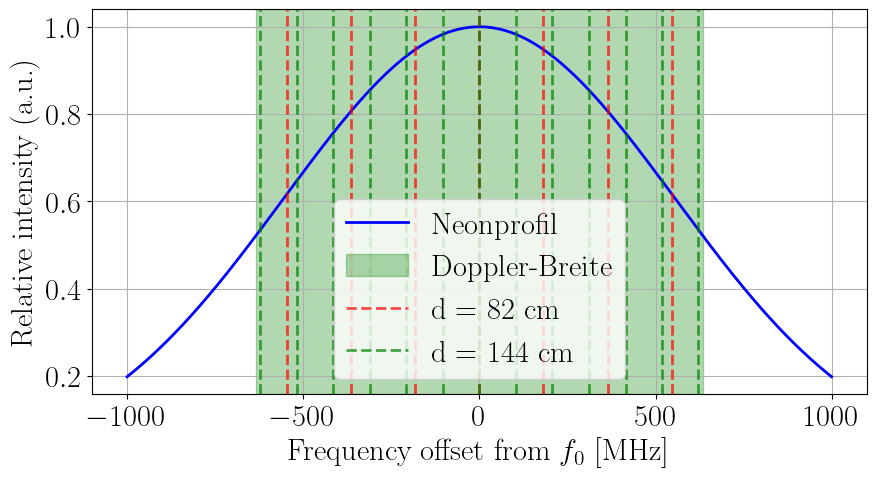

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants as c

# Neon transition (HeNe laser) parameters
wavelength = 632.8e-9  # m
f0 = c.c / wavelength  # Hz
T = 300  # K
m_Ne = 20.18 * 1.66054e-27  # kg (Neon atomic mass)
doppler_fwhm = f0 * np.sqrt(8 * c.k * T * np.log(2) / (m_Ne * c.c**2))  # Hz
doppler_sigma = doppler_fwhm / (2 * np.sqrt(2 * np.log(2)))  # Hz

# Frequency axis for plotting (centered at f0, ±3 GHz)
f_axis = np.linspace(f0 - 1e9, f0 + 1e9, 1000)
doppler_curve = np.exp(-0.5 * ((f_axis - f0) / doppler_sigma)**2)
doppler_curve /= doppler_curve.max()  # Normalize

# Prepare mode frequencies for each resonator length
ds = np.array([82,72,92,102,62,144])/100
fpeaks = [
    [181, 363.7, 545.5, 727, 909, 1091, 1273],
    [206, 413, 620, 826, 1033, 1240],
    [161.7, 323, 485, 647, 810, 972, 1134, 1296],
    [146, 292, 438, 584, 731, 877, 1020, 1169, 1317],
    [239, 478, 718, 957, 1197],
    [103, 207, 310, 414, 517, 621, 724, 828, 932, 1035, 1140, 1242, 1346]
]
# Plot 1: Beat frequency vs. resonator length (already done)
plt.figure(figsize=(10,6))
sort_idx = np.argsort(ds)
ds_sorted = ds[sort_idx]
beat_freqs = []
for d, f in zip(ds, fpeaks):
    fpeak = np.array(f)
    fdiffs = fpeak[1:] - fpeak[:-1]
    beat_freqs.append(fdiffs[fdiffs < 40000].mean())
beat_freqs = np.array(beat_freqs)
beat_freqs_sorted = beat_freqs[sort_idx]
d_fine = np.linspace(ds_sorted.min(), ds_sorted.max(), 300)
theoretical_fine = (c.c / (2 * d_fine)) / 1e6  # in MHz

plt.plot(ds_sorted*100, beat_freqs_sorted, 'k.', label='Messwerte')
plt.plot(d_fine*100, theoretical_fine, 'r-', label=r'$c/(2d)$')
plt.xlabel(r"Resonator length $d$ [cm]")
plt.ylabel(r"$\Delta f$ [MHz]")
plt.legend()
plt.grid(True)
plt.savefig("deltaf.png",dpi=300)
plt.show()

plt.figure(figsize=(10,5))
plt.plot((f_axis-f0)/1e6, doppler_curve, 'b-', label='Neonprofil')

colors = ['r', 'g']
labels = [
    f'd = {int(ds[0]*100)} cm',
    f'd = {int(ds[-1]*100)} cm'
]
plt.axvspan(-1270/2, 1270/2, alpha=0.3, color='green', label='Doppler-Breite')
for i, (d, f) in enumerate(zip([ds[0], ds[-1]], [fpeaks[0], fpeaks[-1]])):
    fpeak = np.array(f) * 1e6  # MHz to Hz
    mode_freqs = f0 + (fpeak - fpeak.mean())
    # Only first and last mode
    for j, freq in enumerate(mode_freqs):
        label = labels[i] if j == 0 else None
        plt.axvline((freq-f0)/1e6, color=colors[i], linestyle='--', alpha=0.7, label=label)
        # Find the closest point on the f_axis for freq
        idx = np.abs(f_axis - freq).argmin()

plt.xlabel(r"Frequency offset from $f_0$ [MHz]")
plt.ylabel("Relative intensity (a.u.)")
plt.legend()
plt.grid(True)
plt.savefig("doppler.png",dpi=300)
plt.show()

In [22]:
dBlendeSchirm = 52  # cm
g = [80, 100]       # µm
deltax = [5/12, 4/12]  # cm pro Maximum

# Umrechnung in Meter
d = dBlendeSchirm / 100  # m
g_m = np.array(g) * 1e-6  # m
deltax_m = np.array(deltax) / 100  # m

# Wellenlänge berechnen
wavelength = g_m * deltax_m / d  # in m

print("Wellenlängen [nm]:", wavelength * 1e9)

Wellenlängen [nm]: [641.02564103 641.02564103]


In [ ]:
import numpy as np

# Konstanten des Experiments
dBlendeSchirm_cm = 52  # cm
D_m = dBlendeSchirm_cm / 100  # m

# Messdaten
# Liste von Tupeln: (Gitterkonstante in µm, [Abstand 1. Maximum in cm, Abstand 2. Maximum in cm])
x = [
    (80, [0.416, 0.85]),
    (100, [0.35, 0.65]),
]

calculated_wavelengths_nm = []

print("--- Auswertung deiner Messdaten ---\n")

for g_um, x_values_cm in x:
  g_m = g_um * 1e-6  # Gitterkonstante in Meter

  # Individuelle delta_x Werte aus den gemessenen Maxima
  delta_x_from_1st = x_values_cm[0] / 1
  delta_x_from_2nd = x_values_cm[1] / 2

  # Mittelwert der delta_x Werte
  delta_x_avg_cm = (delta_x_from_1st + delta_x_from_2nd) / 2
  delta_x_avg_m = delta_x_avg_cm / 100  # in Meter

  # Wellenlänge berechnen: lambda = (g * delta_x) / D
  lambda_m = (g_m * delta_x_avg_m) / D_m
  lambda_nm = lambda_m * 1e9

  calculated_wavelengths_nm.append(lambda_nm)

  print(f"Für g = {g_um} µm:")
  print(f"  Gemittelter Delta_x: {delta_x_avg_cm:.4f} cm")
  print(f"  Berechnete Wellenlänge: {lambda_nm:.1f} nm\n")

# Mittelwert aller berechneten Wellenlängen
if calculated_wavelengths_nm:
  average_lambda_nm = np.mean(calculated_wavelengths_nm)
  print(f"-> Gemittelte Wellenlänge aus allen Messreihen: {average_lambda_nm:.1f} nm")
else:
  print("Keine Messdaten zur Auswertung vorhanden.")

Für einen Laser mit 633 nm Wellenlänge:

--- Gitterkonstante g = 80 µm ---
Abstand 1. Maximum vom Zentrum: 0.411 cm
Abstand 2. Maximum vom Zentrum: 0.823 cm

--- Gitterkonstante g = 100 µm ---
Abstand 1. Maximum vom Zentrum: 0.329 cm
Abstand 2. Maximum vom Zentrum: 0.658 cm

